# Adjusted Model

In [8]:
# import necessary libraries
import numpy as np
from torch import nn
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
from IPython.display import display
from utils import *

In [2]:
! pip install git+https://github.com/davidbau/baukit

Defaulting to user installation because normal site-packages is not writeable

  Running command git clone --filter=blob:none --quiet https://github.com/davidbau/baukit 'C:\Users\J-Dog\AppData\Local\Temp\pip-req-build-uyvbl4oa'



  Cloning https://github.com/davidbau/baukit to c:\users\j-dog\appdata\local\temp\pip-req-build-uyvbl4oa
  Resolved https://github.com/davidbau/baukit to commit 9d51abd51ebf29769aecc38c4cbef459b731a36e
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


Define Global Variable

In [9]:
transform = transforms.Compose([
    transforms.ToTensor(),  
    torchvision.transforms.Grayscale(num_output_channels=1),
    # Convert images to tensors
    transforms.Normalize((0.,), (1.,))  # Normalize image tensors
])

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Train and Evaluate Model

In [11]:
# create train, validition, and test sets
train_set = torchvision.datasets.ImageFolder(
    'imbalanced_data/tumor_healthy/train',
    transform=transform
)

train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=128,
    shuffle=True,
    num_workers=0,  
    pin_memory=True,
)

val_set = torchvision.datasets.ImageFolder(
    'imbalanced_data/tumor_healthy/validation',
    transform=transform
)

val_loader = torch.utils.data.DataLoader(
    val_set,
    batch_size=128,
    shuffle=True,
    num_workers=0, 
    pin_memory=True,
)

test_set = torchvision.datasets.ImageFolder(
    'imbalanced_data/tumor_healthy/test',
    transform=transform
)

test_loader = torch.utils.data.DataLoader(
    test_set,
    batch_size=128,
    shuffle=True,
    num_workers=0,  
    pin_memory=True,
)

epoch: 1/15 | train loss=1.1974, train_acc=0.4282 | val loss: 1.3831, val_acc=0.3933
epoch: 2/15 | train loss=0.8534, train_acc=0.6214 | val loss: 1.2505, val_acc=0.4367
epoch: 3/15 | train loss=0.7267, train_acc=0.6555 | val loss: 1.0302, val_acc=0.4300
epoch: 4/15 | train loss=0.6433, train_acc=0.7124 | val loss: 0.6340, val_acc=0.6800
epoch: 5/15 | train loss=0.5474, train_acc=0.7567 | val loss: 0.8909, val_acc=0.5433
epoch: 6/15 | train loss=0.5085, train_acc=0.7883 | val loss: 0.5374, val_acc=0.8333
epoch: 7/15 | train loss=0.3993, train_acc=0.8365 | val loss: 0.4491, val_acc=0.8500
epoch: 8/15 | train loss=0.4193, train_acc=0.8506 | val loss: 0.6417, val_acc=0.7367
epoch: 9/15 | train loss=0.4048, train_acc=0.8438 | val loss: 0.5815, val_acc=0.7367
epoch: 10/15 | train loss=0.3397, train_acc=0.8676 | val loss: 0.4599, val_acc=0.8233
epoch: 11/15 | train loss=0.3284, train_acc=0.8662 | val loss: 0.6391, val_acc=0.7200
epoch: 12/15 | train loss=0.2849, train_acc=0.8769 | val loss: 

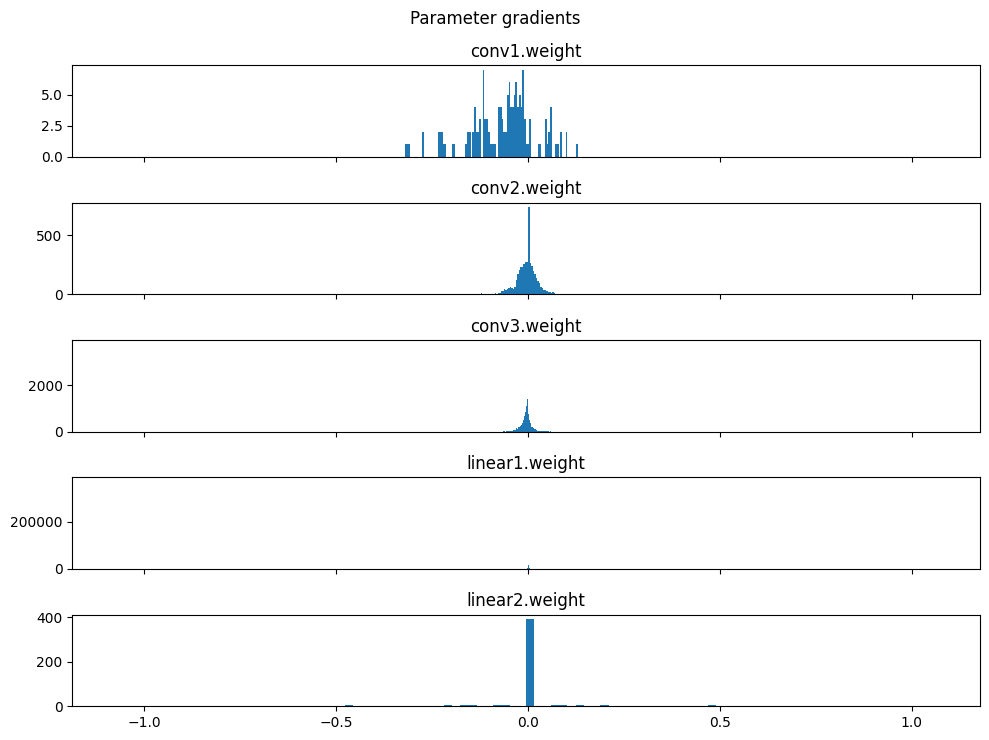

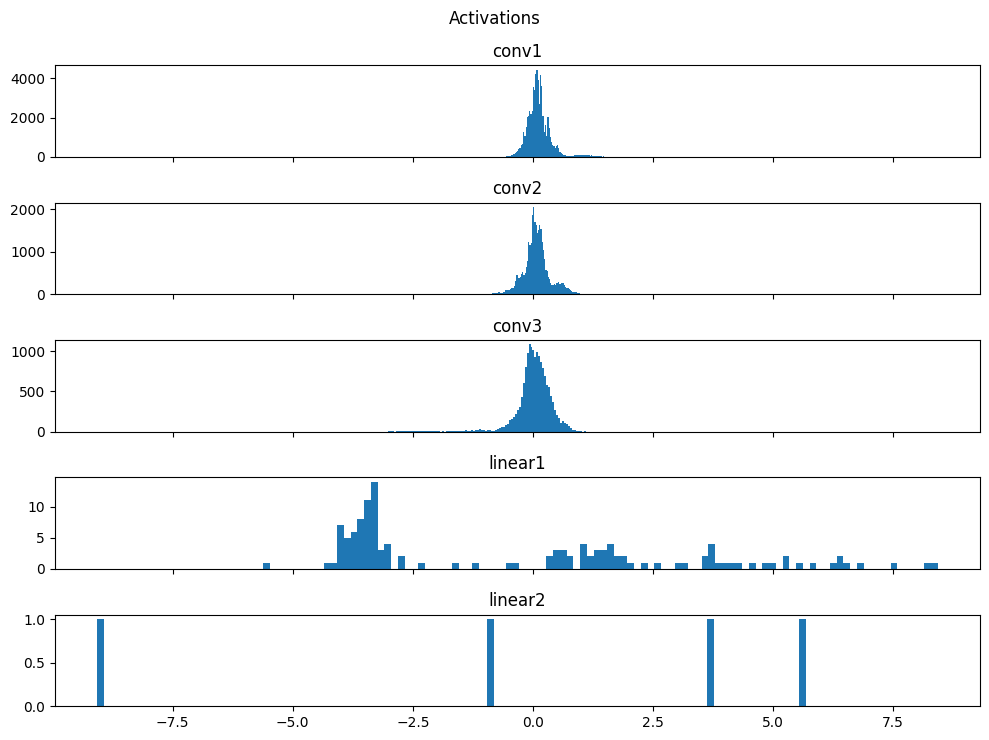

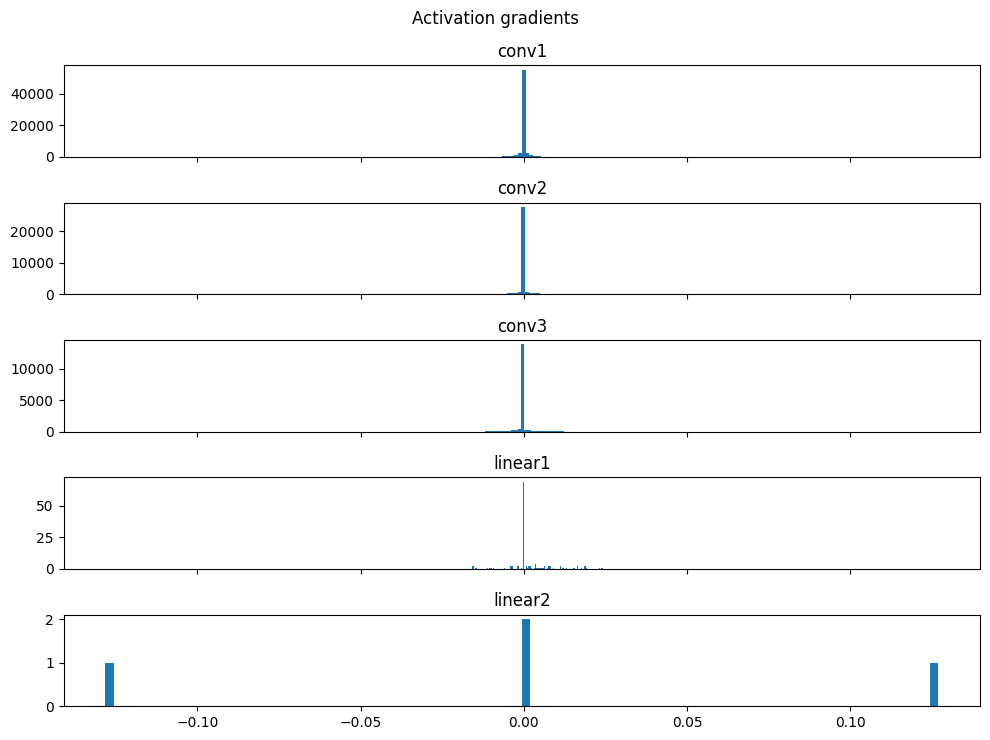

epoch: 15/15 | train loss=0.2750, train_acc=0.8774 | val loss: 0.4629, val_acc=0.8033


In [17]:
# number of classes in the dataset
num_classes = len(train_set.classes)

# create adjusted model
model = BrainTumorCNN(num_classes).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 15

training_losses = []
training_accuracy = []
validation_losses = []
validation_accuracy = []

for epoch in range(epochs):
    plot_grads = True if epoch  == 14 else False
    train_loss, train_acc = train_model(model, train_loader, loss_fn, optimizer, plot_grads)
    training_losses.append(train_loss)
    training_accuracy.append(train_acc)
    val_loss, val_acc, val_precision, val_recall = evaluate_model(model, val_loader, loss_fn, device)
    validation_losses.append(val_loss)
    validation_accuracy.append(val_acc)
    print(
        f"epoch: {epoch+1}/{epochs} | train loss={np.mean(train_loss):.4f}, {train_acc=:.4f} | val loss: {np.mean(val_loss):.4f}, {val_acc=:.4f}"
    )

Test Loss: 0.595792810122172, Test Accuracy: 0.82, Test Precision: 0.82, Test Recall: 0.82


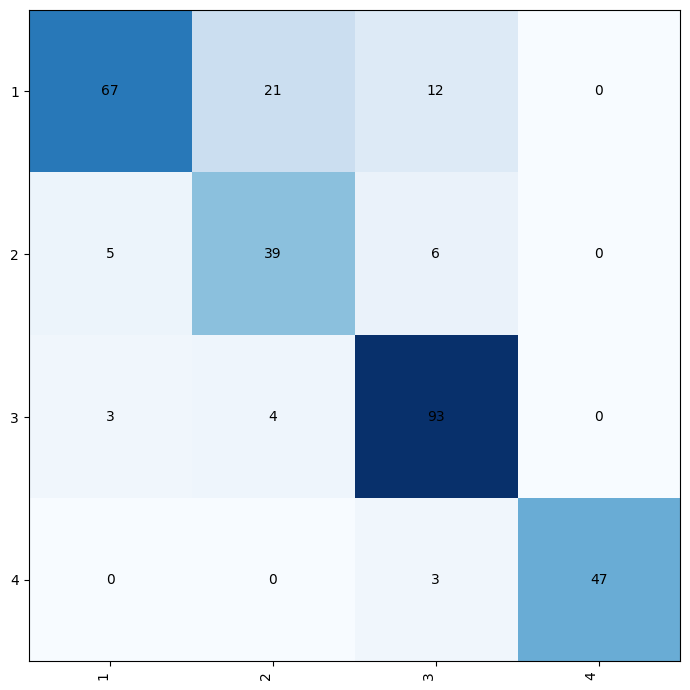

In [18]:
# get metrics and confusion matrix
test_loss, test_acc, test_precision, test_recall, test_confusion_matrix = evaluate_model(
    model, test_loader, loss_fn, device, return_confusion_matrix=True
)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}, Test Precision: {test_precision}, Test Recall: {test_recall}")
draw_confusion_matrix(test_confusion_matrix, test_set, train_set.classes)

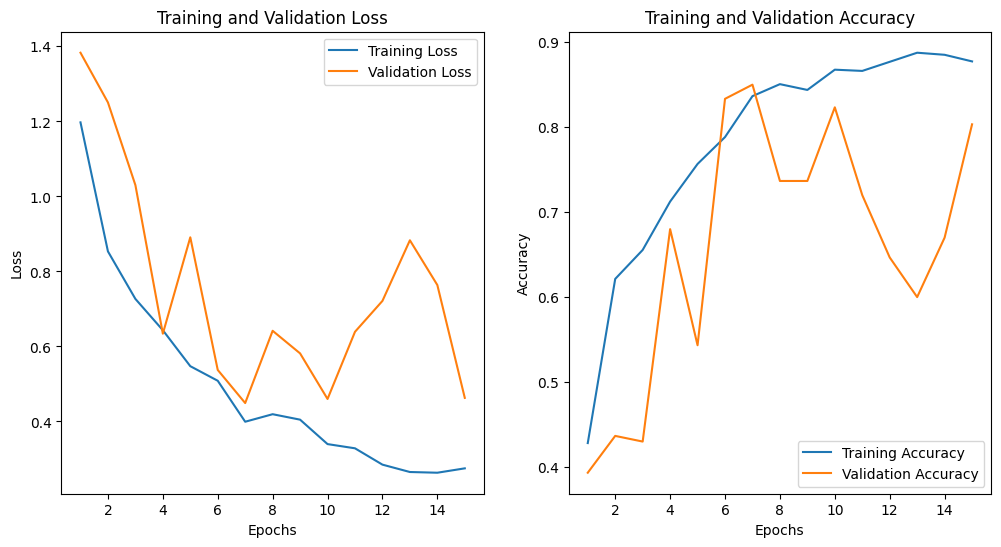

In [20]:
# plot train and val loss
plot_train_val_graphs(epochs, training_losses, training_accuracy, validation_losses, validation_accuracy)

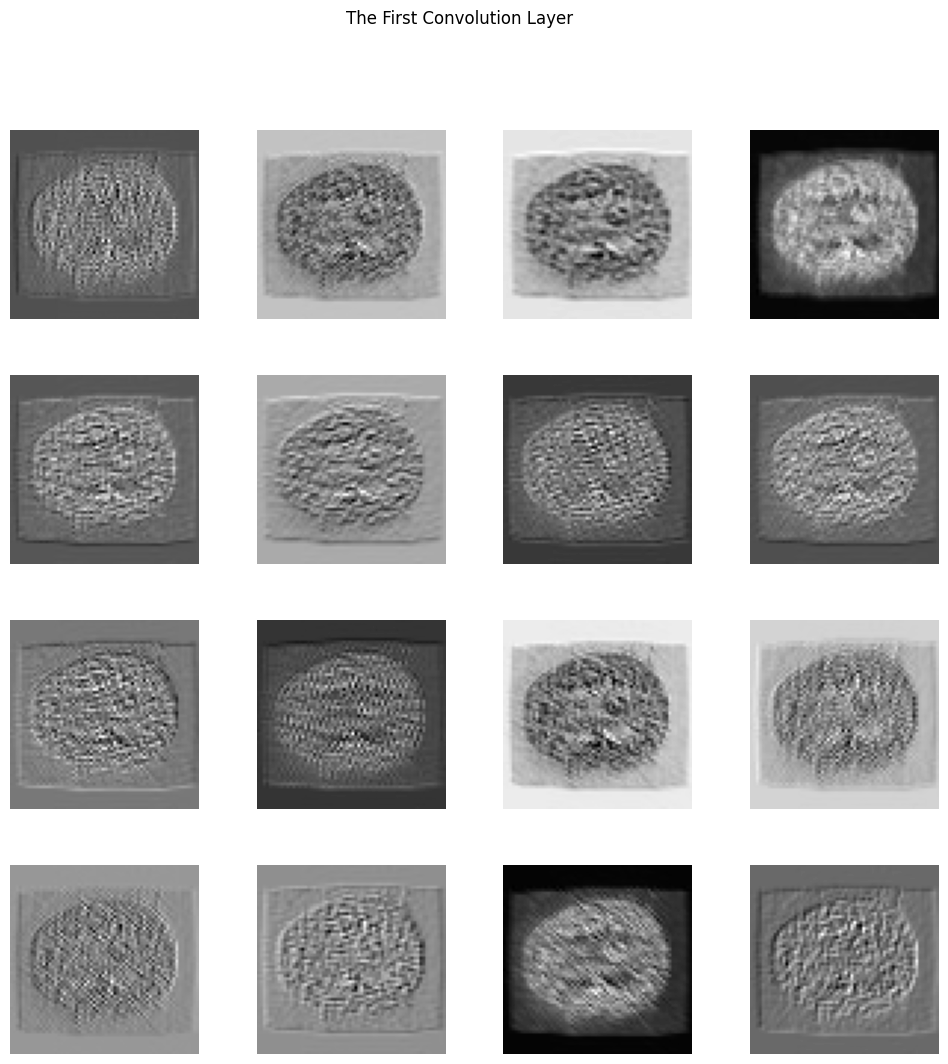

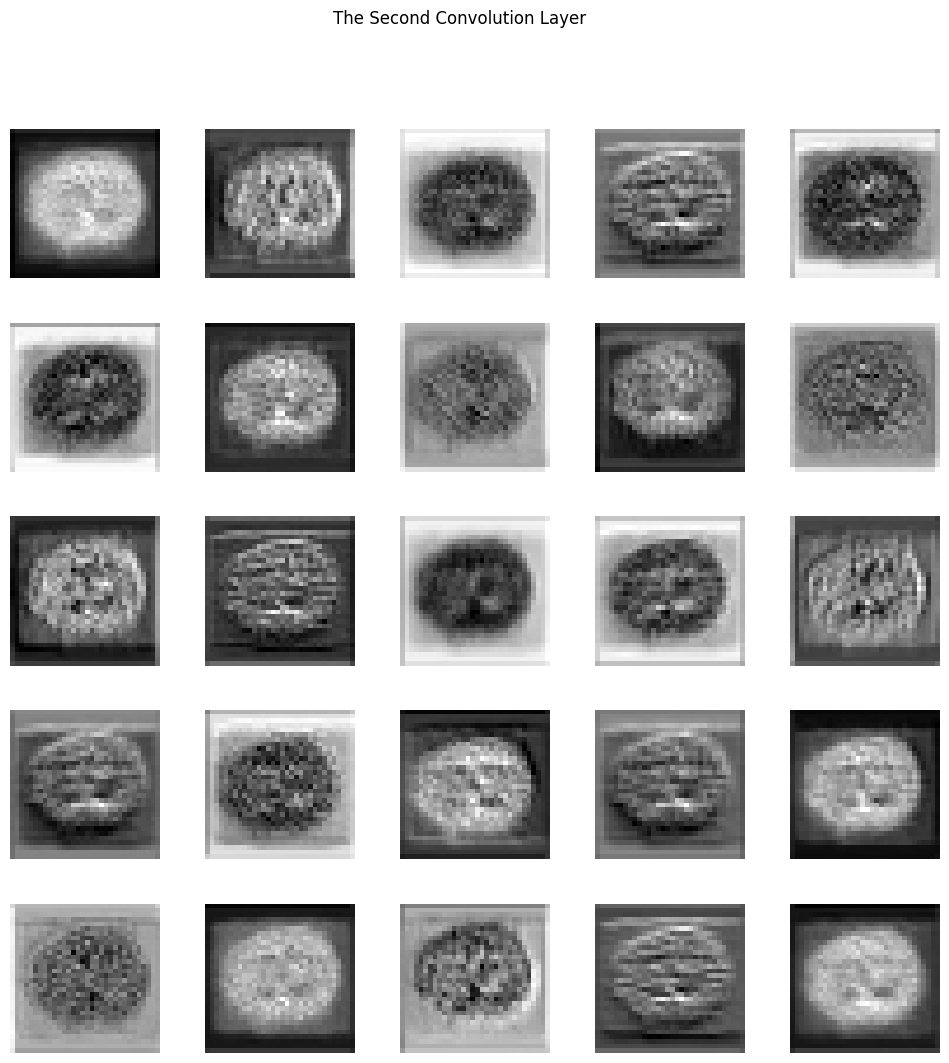

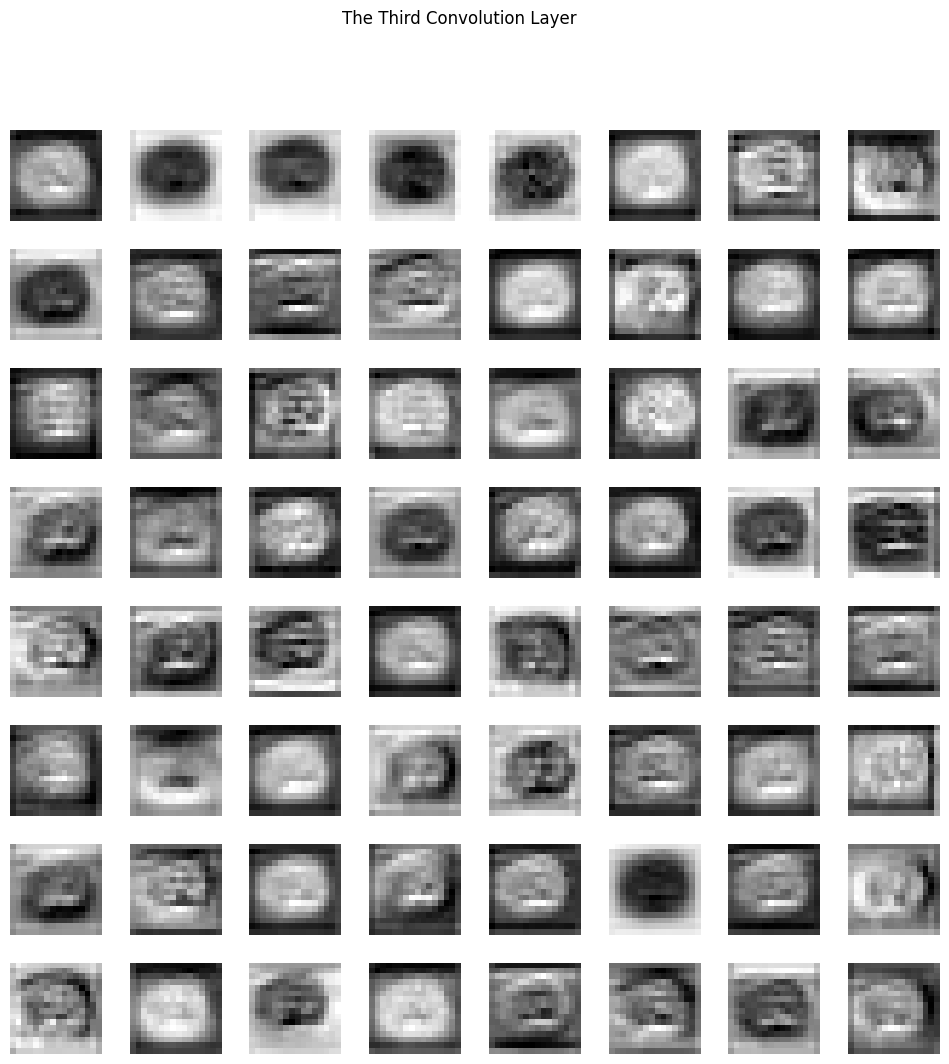

In [21]:
# observere intermediate layer outputs
visualize_con_layers_adjusted(model, device, test_loader)